# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [308]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "/Users/admin/Downloads/Mouse_metadata.csv"
study_results_path = "/Users/admin/Downloads/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("/Users/admin/Downloads/Mouse_metadata.csv")
study_results = pd.read_csv("/Users/admin/Downloads/Study_results.csv")

# Combine the data into a single DataFrame
combined_mouse_study = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
print(combined_mouse_study.head)

<bound method NDFrame.head of      Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        a203    Infubinol  Female          20          23          0   
1        a203    Infubinol  Female          20          23          5   
2        a203    Infubinol  Female          20          23         10   
3        a203    Infubinol  Female          20          23         15   
4        a203    Infubinol  Female          20          23         20   
...       ...          ...     ...         ...         ...        ...   
1888     z969     Naftisol    Male           9          30         25   
1889     z969     Naftisol    Male           9          30         30   
1890     z969     Naftisol    Male           9          30         35   
1891     z969     Naftisol    Male           9          30         40   
1892     z969     Naftisol    Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1  

In [309]:
# Checking the number of mice.
mouse_count = mouse_metadata["Mouse ID"].nunique()
print(mouse_count)

249


In [310]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_mouse_study[combined_mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(duplicate_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
586     g989     Propriva  Female          21          26          0   
587     g989     Propriva  Female          21          26          0   
588     g989     Propriva  Female          21          26          5   
589     g989     Propriva  Female          21          26          5   
590     g989     Propriva  Female          21          26         10   
591     g989     Propriva  Female          21          26         10   
592     g989     Propriva  Female          21          26         15   
593     g989     Propriva  Female          21          26         15   
594     g989     Propriva  Female          21          26         20   
595     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
586           45.000000                 0  
587           45.000000                 0  
588           48.786801                 0  
589           47.570392        

In [311]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates = combined_mouse_study[combined_mouse_study.duplicated(subset=['Mouse ID'], keep=False)]
print(duplicates)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        a203    Infubinol  Female          20          23          0   
1        a203    Infubinol  Female          20          23          5   
2        a203    Infubinol  Female          20          23         10   
3        a203    Infubinol  Female          20          23         15   
4        a203    Infubinol  Female          20          23         20   
...       ...          ...     ...         ...         ...        ...   
1888     z969     Naftisol    Male           9          30         25   
1889     z969     Naftisol    Male           9          30         30   
1890     z969     Naftisol    Male           9          30         35   
1891     z969     Naftisol    Male           9          30         40   
1892     z969     Naftisol    Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              48.508468         

In [312]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mousey_df = combined_mouse_study.drop_duplicates(subset= ['Mouse ID', 'Timepoint'])
print(clean_mousey_df)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        a203    Infubinol  Female          20          23          0   
1        a203    Infubinol  Female          20          23          5   
2        a203    Infubinol  Female          20          23         10   
3        a203    Infubinol  Female          20          23         15   
4        a203    Infubinol  Female          20          23         20   
...       ...          ...     ...         ...         ...        ...   
1888     z969     Naftisol    Male           9          30         25   
1889     z969     Naftisol    Male           9          30         30   
1890     z969     Naftisol    Male           9          30         35   
1891     z969     Naftisol    Male           9          30         40   
1892     z969     Naftisol    Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              48.508468         

In [313]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_mousey_df["Mouse ID"].nunique()
clean_mouse_count

249

## Summary Statistics

In [314]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = clean_mousey_df.groupby(by=['Drug Regimen'])['Tumor Volume (mm3)'].mean()
mean

median = clean_mousey_df.groupby(by=['Drug Regimen'])['Tumor Volume (mm3)'].median()
median

variance = clean_mousey_df.groupby(by=['Drug Regimen'])['Tumor Volume (mm3)'].var()
variance

standard_deviation = clean_mousey_df.groupby(by=['Drug Regimen'])['Tumor Volume (mm3)'].std()
standard_deviation

sem = clean_mousey_df.groupby(by=['Drug Regimen'])['Tumor Volume (mm3)'].sem()
sem

statistical_summary = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'STD': standard_deviation,
    'SEM': sem
}
)
print(statistical_summary)


                   Mean     Median   Variance       STD       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [315]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
statistical_summary = clean_mousey_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean= 'mean',
    median='median',
    variance='var',
    STD='std',
    SEM='sem'
)
print(statistical_summary)

                   mean     median   variance       STD       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

In [316]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_count = clean_mousey_df['Drug Regimen'].value_counts()
regimen_count.plot(kind='bar', figsize=(10, 5), color='violet')
plt.title('Total Number of rows/timepoints for each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

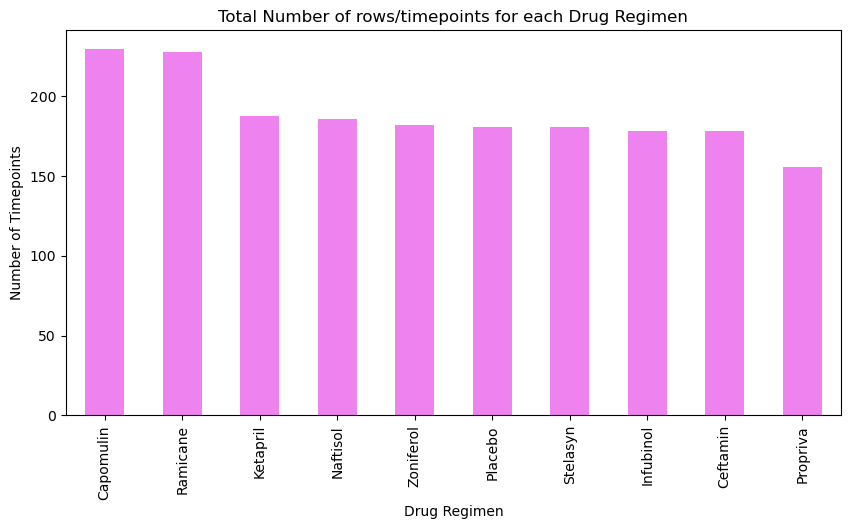

In [317]:
#show bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plt.show()

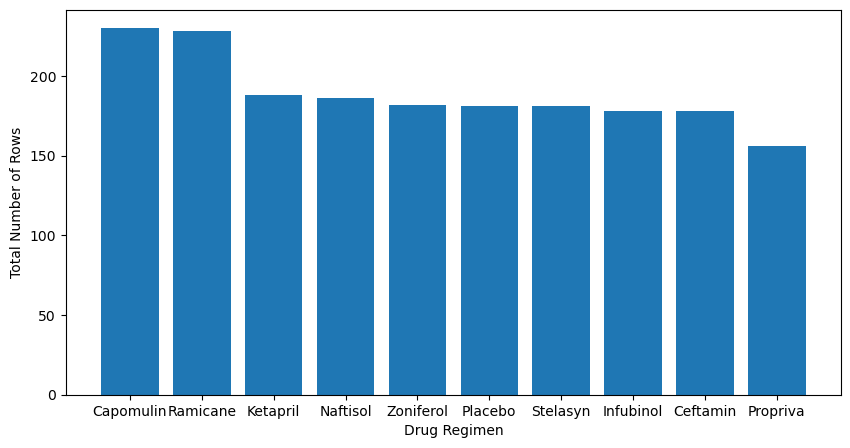

In [318]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimens = clean_mousey_df['Drug Regimen'].value_counts()
plt.figure(figsize=(10, 5),)
plt.bar(drug_regimens.index, drug_regimens.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')
plt.show()

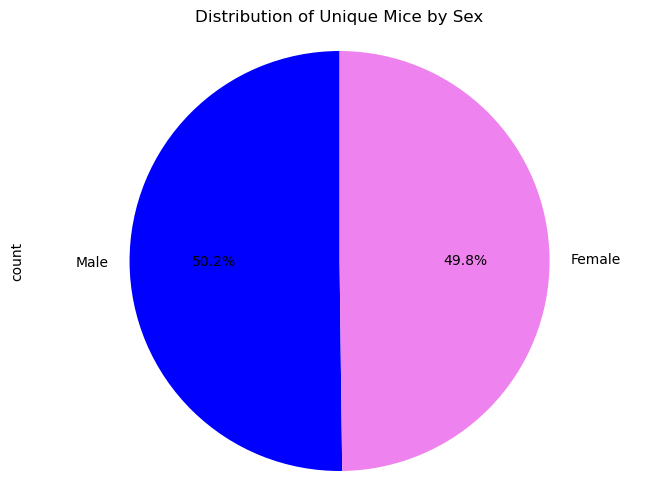

In [319]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_by_sex = clean_mousey_df[['Mouse ID', 'Sex']].drop_duplicates()
mice_by_sex_count = mice_by_sex['Sex'].value_counts() 

# Color changes
colors= ['blue', 'violet']

# Make the pie chart
mice_by_sex_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, title="Distribution of Unique Mice by Sex", figsize=(8, 6), colors=colors)
plt.axis('equal')
plt.show()

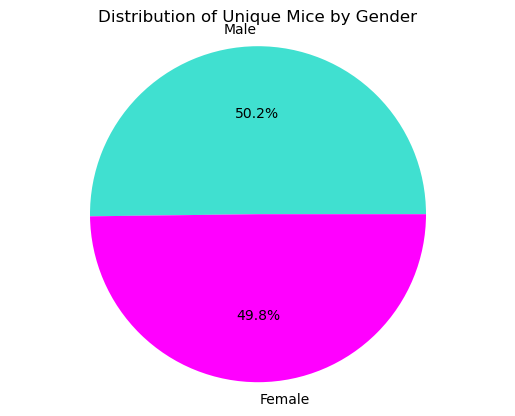

In [320]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

unique_mice_by_gender = clean_mousey_df[['Mouse ID', 'Sex']].drop_duplicates()
count_unique_mice_by_gender =unique_mice_by_gender['Sex'].value_counts()
colors= ('turquoise', 'Fuchsia')
# Make the pie chart
plt.figure()
plt.pie(count_unique_mice_by_gender, labels=count_unique_mice_by_gender.index, colors=colors, autopct="%1.1f%%")
plt.title('Distribution of Unique Mice by Gender')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [321]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_volume = clean_mousey_df.groupby("Mouse ID")['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mousey_merge = tumor_volume.merge(clean_mousey_df, on=['Mouse ID', 'Timepoint'], how='left')
print(mousey_merge)

    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
244     z435         10     Propriva  Female          12          26   
245     z578         45     Ramicane    Male          11          16   
246     z581         45    Infubinol  Female          24          25   
247     z795         45     Naftisol  Female          13          29   
248     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2  

In [322]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'infubinol', 'Ceftamin']

# Create empty list to fill with tumour volume data (for plotting)
new_list = []
for treatment in treatments:
    try:
        # Locate the rows which contain mice on each drug and get the tumour volumes
        tumor_volume = mousey_merge.loc[mousey_merge["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
        
        # Append the tumor volumes to the list
        new_list.append(tumor_volume)

        # Calculate the IQR and quantitatively determine if there are any potential outliers.
        quartiles = tumor_volume.quantile([.25, .5, .75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5 * iqr)
        upper_bound = upperq + (1.5 * iqr)
        
        # Identify outliers
        outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
        print(f"{treatment} outliers are equal to {outliers}")
    except KeyError as e:
        print(f"KeyError: {e} - The treatment '{treatment}' may not exist in the DataFrame.")
    except Exception as e:
        print(f"An error occurred: {e}")

Capomulin outliers are equal to Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers are equal to Series([], Name: Tumor Volume (mm3), dtype: float64)
infubinol outliers are equal to Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin outliers are equal to Series([], Name: Tumor Volume (mm3), dtype: float64)


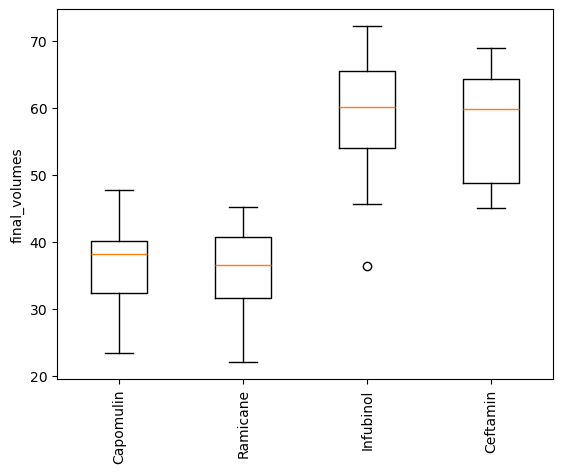

In [323]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, tick_labels= treatment_list)
plt.xticks(rotation=90)
plt.ylabel('final_volumes')
plt.show()

## Line and Scatter Plots

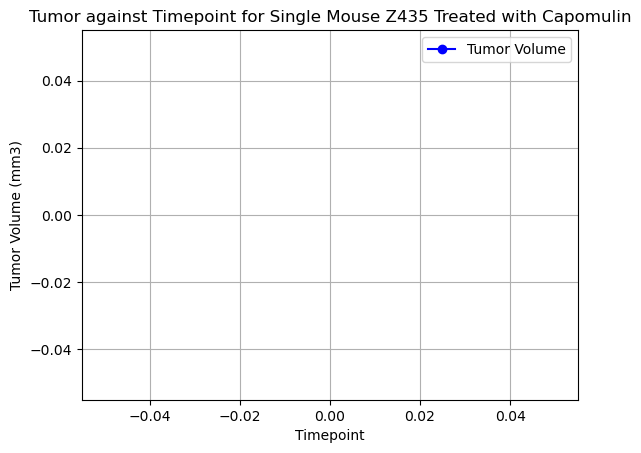

In [324]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
isolate = "Capomulin"

# Single Mouse ID
mousey_id = "Z435"

mousey_data = mousey_merge.loc[(mousey_merge["Drug Regimen"] == isolate) & (mousey_merge["Mouse ID"] == mousey_id)]

# Check if mousey_data is not empty

    # Extract x and y values
x_values = mousey_data["Timepoint"]
y_values = mousey_data["Tumor Volume (mm3)"]

    # Make line plot
plt.plot(x_values, y_values, marker='o', color='blue', label='Tumor Volume')  # Add this line to plot the data
plt.title(f'Tumor against Timepoint for Single Mouse {mousey_id} Treated with {isolate}')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.legend()
plt.show()


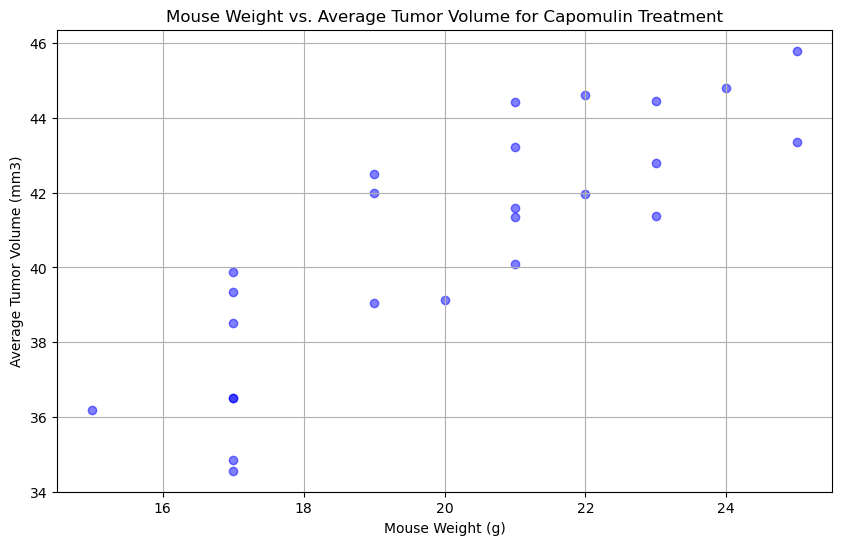

In [325]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_results = clean_mousey_df[clean_mousey_df['Drug Regimen'] == 'Capomulin']

average_observed_tumor_volume = capomulin_results.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mousey_weight = capomulin_results.groupby('Mouse ID')['Weight (g)'].first()

plt.figure(figsize=(10,6))
plt.scatter(mousey_weight, average_observed_tumor_volume, color='blue', alpha=0.5)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()


## Correlation and Regression

Correlation coefficient; 1.0


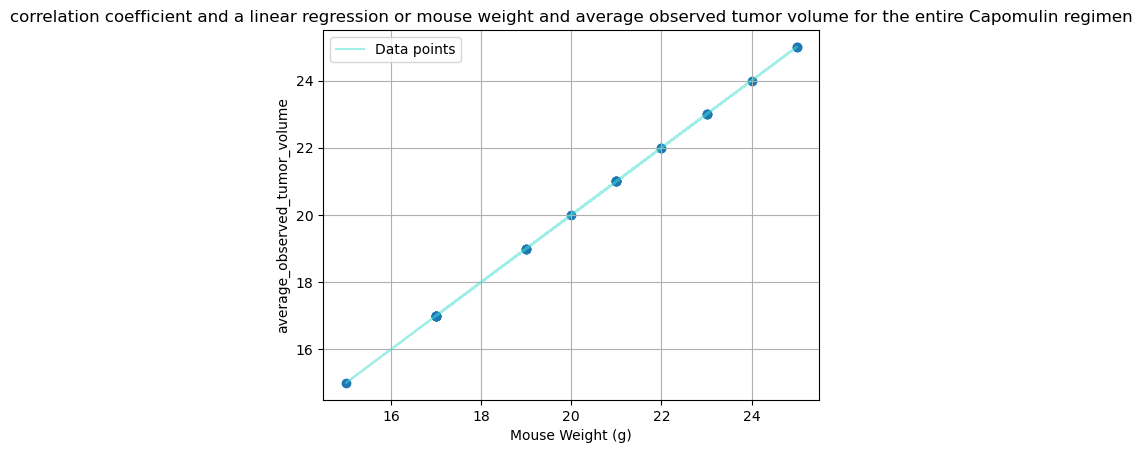

In [326]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress
from numpy import corrcoef

capomulin_results = clean_mousey_df[clean_mousey_df['Drug Regimen'] == 'Capomulin']
average_observed_tumor_volume = capomulin_results.groupby('Mouse ID')['Weight (g)'].first()

correlation = np.corrcoef(mousey_weight, average_observed_tumor_volume)[0, 1]
print(f'Correlation coefficient; {correlation}')

slope, intercept, r_value, p_value, std_err = linregress(mousey_weight, average_observed_tumor_volume)

regression_line = slope * mousey_weight + intercept

plt.scatter(mousey_weight, average_observed_tumor_volume)
plt.plot(mousey_weight, average_observed_tumor_volume, color='turquoise', alpha=0.5, label='Data points')
plt.title("correlation coefficient and a linear regression or mouse weight and average observed tumor volume for the entire Capomulin regimen")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('average_observed_tumor_volume')
plt.legend()
plt.grid(True)
plt.show()